In [39]:
## Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in 
## portfolio assignment 4.
import pandas as pd
import seaborn as sns
imdb = pd.read_csv('imdb_top_1000.csv', sep=",")

def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")
    
imdb.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [40]:
## Do you expect their to be a correlation between the two columns?
## I do expect there to be a correlation between Certificate and Genre, because in my opinion the combinations of Genre can
## definitely influence the given Certificate.

In [41]:
## Create a contingency table. Do you observe different ratios between categories here?
imdbContingencyTable = create_contingency_table(imdb, 'Certificate','Genre')
imdbContingencyTable

## Its quite difficult to spot any differences between the ratios due to the unreadable table. It is however possible to see
## that certain genres are mostly given a certain certificate (when the certificate has to do with the age of the target group).

Certificate                  16  A  Approved  G  GP  PG  PG-13  Passed  R  \
Genre                                                                       
Animation, Drama, Family      1  0         0  0   0   0      0       0  0   
Action, Adventure             0  2         0  0   0   0      0       0  0   
Action, Adventure, Comedy     0  1         0  0   0   0      0       1  2   
Action, Adventure, Drama      0  2         0  0   0   0      1       1  0   
Action, Adventure, Horror     0  1         0  0   0   0      0       0  0   
...                          .. ..       ... ..  ..  ..    ...     ... ..   
Animation, Action, Sci-Fi     0  0         0  0   0   0      0       0  0   
Animation, Biography, Crime   0  0         0  0   0   0      0       0  0   
Crime, Drama, Music           0  0         0  0   0   0      0       0  0   
Drama, Fantasy, War           0  0         0  0   0   0      0       0  0   
Drama, History, Mystery       0  0         0  0   0   0      0       0  0   

Certificate                  TV-14  TV-MA  TV-PG  U  U/A  UA  Unrated  
Genre                                                                  
Animation, Drama, Family         0      0      0  3    0   0        0  
Action, Adventure                0      0      0  1    0   2        0  
Action, Adventure, Comedy        0      0      0  2    0   4        0  
Action, Adventure, Drama         0      0      0  3    0   6        0  
Action, Adventure, Horror        0      0      0  0    0   0        0  
...                            ...    ...    ... ..  ...  ..      ...  
Animation, Action, Sci-Fi        0      0      0  0    0   1        0  
Animation, Biography, Crime      0      0      0  0    0   1        0  
Crime, Drama, Music              0      0      0  0    0   1        0  
Drama, Fantasy, War              0      0      0  0    0   1        0  
Drama, History, Mystery          0      0      0  0    0   1        0  

[191 rows x 16 columns]

<AxesSubplot:xlabel='Genre'>

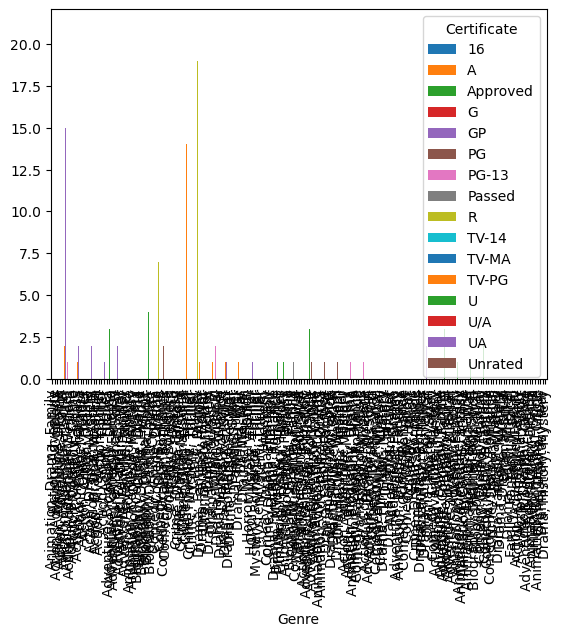

In [42]:
## Create a bar plot for this contingency table. Do you observe different ratios between categories here?
imdbContingencyTable.plot(kind='bar')

## The ratio between all the columns is very different. Although there are some certificates that do have (almost) the same
## ratio like the "TV-PG" and the "UA" certificates. So there is some similarity in the ratios between some certificates.

In [43]:
## Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?
check_cat_vs_cat_correlation(imdb, 'Certificate','Genre')

## The result says that there is a very high odd of a correlation (100%) between Certificate and Genre so the chance of there
## being a correlation is very high. This correlation is a "significant correlation", because the result from the calculation
## exceeds the minimum requirement of 95%.

The odds of a correlation between Certificate and Genre is 100.0% (Based on a p value of 1.553037605967622e-22).
This percentage needs to be at least 95% for a significant correlation.
